<a href="https://colab.research.google.com/github/diegortiz6685/Portafolio/blob/main/U9Sesion_2_Ejercicios_80772700.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO 1: Visualización de la Distribución de Precios con Boxplot

,Venta_ID,Fecha,Producto,Categoría,Cantidad Vendida,Precio Unitario
0,1,2023-06-01,Impresora,Electrónica,25,1215.98
1,2,2023-06-02,Mouse,Oficina,42,752.09
2,3,2023-06-03,Mouse,Accesorios,11,2012.38
3,4,2023-06-04,Teclado,Accesorios,24,1217.56
4,5,2023-06-05,Monitor,Computación,17,413.41
5,6,2023-06-06,Monitor,Accesorios,39,962.93
6,7,2023-06-07,Mouse,Electrónica,8,1764.83
7,8,2023-06-08,Laptop,Oficina,40,1095.72
8,9,2023-06-09,Mouse,Oficina,23,1712.26
9,10,2023-06-10,Monitor,Oficina,5,715.40


<Axes: xlabel='Categoría', ylabel='Precio Unitario'>

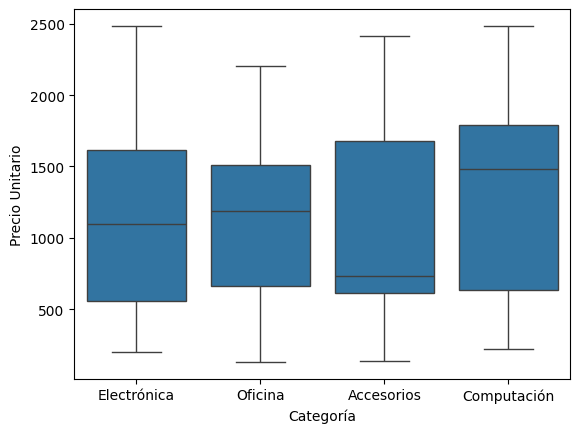

In [ ]:
#1. Cargar datos y librerías
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1JS7jkpbWMaOlpsh_7Q6P8nue1U9aiM-C')
display(df.head(10))

#3. Generación de boxplot con Seaborn
sns.boxplot(x=df['Categoría'],y=df['Precio Unitario'])

EJERCICIO 2: Visualización de la Correlación entre Variables con un Heatmap

,Venta_ID,Cantidad Vendida,Precio Unitario
0,1,25,1215.98
1,2,42,752.09
2,3,11,2012.38
3,4,24,1217.56
4,5,17,413.41
5,6,39,962.93
6,7,8,1764.83
7,8,40,1095.72
8,9,23,1712.26
9,10,5,715.40


<Axes: >

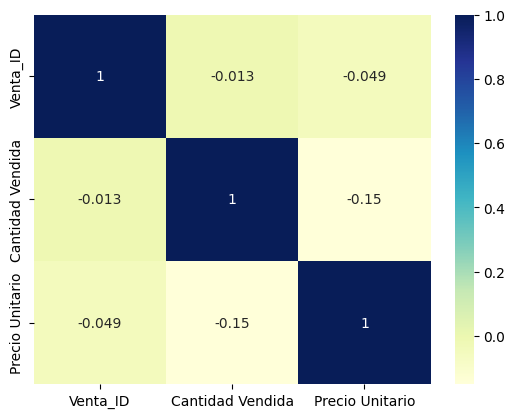

In [ ]:
#2. Seleccionar columnas numéricas
mapa_calor = df.select_dtypes(include=['float64','int64'])
display(mapa_calor.head(10))

#4. Generación de heatmap con Seaborn
sns.heatmap(mapa_calor.corr(),annot=True,cmap='YlGnBu')

EJERCICIO 3: Análisis de la Distribución de la Cantidad Vendida por Producto con Boxplot

,Cantidad Vendida
Producto,
Impresora,252
Laptop,702
Monitor,218
Mouse,249
Smartphone,204
Tablet,136
Teclado,323


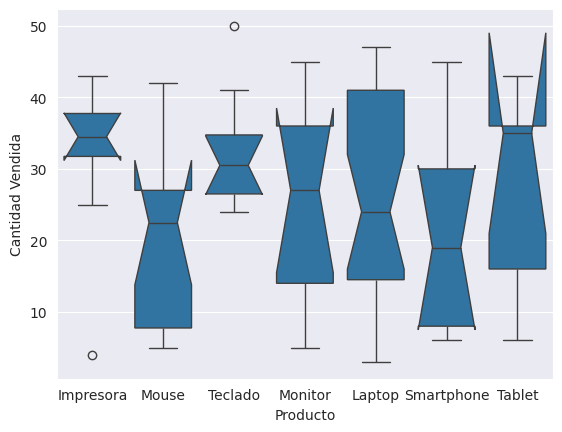

In [ ]:
suma_prod = df.groupby('Producto')['Cantidad Vendida'].sum()
display(suma_prod)

#3. Generación de boxplot con Seaborn
sns.boxplot(x=df['Producto'],y=df['Cantidad Vendida'],notch=True)
sns.set_style("darkgrid")

EJERCICIO 4:  Visualización del Total de Ventas por Categoría y Producto con un Heatmap

La Tabla Pivote



Producto,Impresora,Laptop,Monitor,Mouse,Smartphone,Tablet,Teclado
Categoría,,,,,,,
Accesorios,38156.40,161589.82,119444.65,32231.68,5687.28,10832.16,53280.64
Computación,197409.28,136985.95,69136.59,98829.62,134068.84,105456.44,117930.78
Electrónica,52740.10,321486.44,NaN,46795.12,30867.40,74162.92,107381.52
Oficina,5629.38,50734.02,16068.28,148926.31,66173.09,NaN,126413.91



El mapa de calor:



<Axes: xlabel='Producto', ylabel='Categoría'>

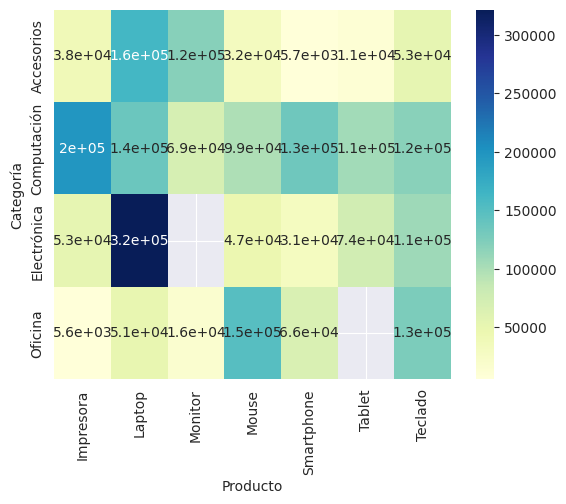

In [ ]:
#Crear Columna Total Ventas
df['Total Ventas'] = df['Precio Unitario'] * df['Cantidad Vendida']

#Crear Tabla Pivote
pivote = pd.pivot_table(df,index='Categoría',columns='Producto',values='Total Ventas',aggfunc='sum')
print("La Tabla Pivote\n")
display(pivote)

#4. Generación de heatmap con Seaborn
print("\nEl mapa de calor:\n")
sns.heatmap(pivote,annot=True,cmap='YlGnBu')